# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [1]:
import statsmodels.api
import statsmodels as sm
import numpy as np
import pandas as pd

df = pd.read_csv('data/tennis.csv').dropna()

est = sm.regression.linear_model.OLS(np.array(df['player1 total points won']), np.array(df['player2 total points won'])).fit()

print(sm.stats.weightstats.ttest_ind(np.array(df['player1 total points won']), np.array(df['player2 total points won'])))
est.summary()

(10.142736499527302, 1.2909773137512344e-23, 2030.0)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          3.173e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:32:29   Log-Likelihood:                         -4262.4
No. Observations:                1016   AIC:                                      8527.
Df Residuals:                    1015   BIC:                                      8532.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1257      0.006    178.124      0.000       1.113       1.138
==============================================================================
Omnibus:                       71.489   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.456
Skew:                          -0.707   Prob(JB):                     2.78e-19
Kurtosis:                       3.148   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
y = np.asarray(df['player1 total points won'])
x = np.asarray(df['player2 total points won'])
x = sm.api.add_constant(x)
x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)

print(sm.stats.weightstats.ttest_ind(y, x[:,1]))
sm.regression.linear_model.OLS(y, x).fit().summary()

(10.142736499527302, 1.2909773137512344e-23, 2030.0)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1986.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:33:54   Log-Likelihood:                -4008.6
No. Observations:                1016   AIC:                             8023.
Df Residuals:                    1013   BIC:                             8038.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5780      2.142     15.676      0.000      29.375      37.781
x1             0.6315      0.050     12.513      0.000       0.532       0.731
x2             0.0010      0.000      3.865      0.000       0.001       0.002
==============================================================================
Omnibus:                       63.730   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.546
Skew:                          -0.566   Prob(JB):                     1.96e-18
Kurtosis:                       3.804   Cond. No.                     4.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color='green'>The Coefficient is the ratio of Federer's points over his opponents, showing he scored 1.1257 pts per opponents pts. The p-value gives us thee confidence that the value is correct and Federer is on average the better player. A constant term isn't necessary for this as the data provided is unbiased and the R & R-squared are equal. A constant term will change the R-squared value but will not affect the other terms. Also, as displayed in the 2 different tests, wherein one has a constant term, there is no difference in the t-test when using a constant term.</font>

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


In [7]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

df = pd.read_csv('data/college.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [8]:
x = np.asarray(df['Top10perc'])
y = np.asarray(df['Top25perc'])

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              7971.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:35:55   Log-Likelihood:                         -3332.4
No. Observations:                 777   AIC:                                      6667.
Df Residuals:                     776   BIC:                                      6671.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7275      0.019     89.281      0.000       1.690       1.766
==============================================================================
Omnibus:                      290.739   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1310.349
Skew:                          -1.681   Prob(JB):                    2.89e-285
Kurtosis:                       8.401   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

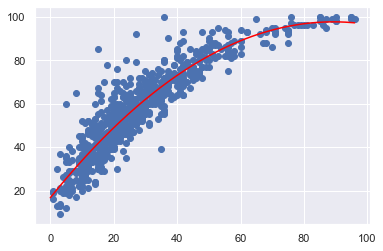

A polynomial of 2 seems to fit the relation best as the scatter shows a more parabolic nature between the 2.
A constant term will not be useful as there is minimal change.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2220.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          2.50e-321
Time:                        23:37:46   Log-Likelihood:                -2681.0
No. Observations:                 777   AIC:                             5368.
Df Residuals:                     774   BIC:                             5382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6786      0.845     19.738      0.000      15.020      18.337
x1             1.8140      0.050     36.229      0.000       1.716       1.912
x2            -0.0102      0.001    -17.072      0.000      -0.011      -0.009
==============================================================================
Omnibus:                      177.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.823
Skew:                           1.089   Prob(JB):                    1.12e-124
Kurtosis:                       6.590   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
x = np.asarray(df['Top10perc'])
y = np.asarray(df['Top25perc'])

x = sm.add_constant(x)
x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)

est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, max(x[:,1]), 1000))
xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit, color='red')
plt.show()

print("A polynomial of 2 seems to fit the relation best as the scatter shows a more parabolic nature between the 2.\n"
      "A constant term will not be useful as there is minimal change.")
est.summary()

In [4]:
import statsmodels as sm
df.Private = df.Private.eq('Yes').mul(1)
sm.stats.weightstats.ttest_ind(np.asarray(df['Accept']), np.asarray(df['Private']))
print("The t-test suggests there's no reason why private schools have more admissions.")

The t-test suggests there's no reason why private schools have more admissions.


# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [15]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

with open('data/auto.csv', 'r') as f:
          lines = f.readlines()

data = [lines[0]] + lines[2:]
data = io.StringIO("\n".join([s for s in data]))
auto = pd.read_csv(data, delim_whitespace=True)
auto.horsepower = auto.horsepower.replace("?", np.nan).astype(float)
auto = auto.dropna(axis='index')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


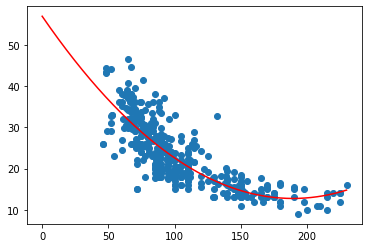

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           5.40e-99
Time:                        14:11:09   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.000      53.360      60.440
x1            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
x2             0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
import statsmodels.api as sm
x = np.asarray(auto.horsepower)
y = np.asarray(auto.mpg)

x = sm.add_constant(x)
x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)

est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, max(x[:,1]), 1000))
xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit, color='red')
plt.show()

est.summary()

i. <font color='green'>There is a somewhat parabolic relationship between the predictor and response variables.</font>


ii. <font color='green'>The relationship is very strong with minimal error</font>


iii. <font color='green'>The relationship appears to be mostly negative.</font>


iv. <font color='green'>Around 25 mpg</font>


v. <font color='green'>Refer to above</font>

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [7]:
from sklearn import linear_model

x = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = auto.mpg

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

Intercept: 
 -17.218434622017515
Coefficients: 
 [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          2.04e-139
Time:                        09:12:26   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

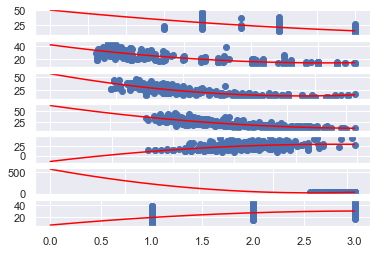

In [19]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7)

def reg_plot_on_ax(feature, ax):
    x = feature
    x = sm.add_constant(x)
    x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)
    y = auto.mpg

    est = sm.OLS(y, x).fit()
    xfit = sm.add_constant(np.linspace(0, max(x[:,1]), 1000))
    xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
    yfit = est.predict(xfit[:, np.newaxis])
    ax.scatter(x[:,1], y)
    ax.plot(xfit[:,1], yfit, color="red")
    
feature_1 = np.asarray(auto.cylinders)
feature_2 = np.asarray(auto.displacement)
feature_3 = np.asarray(auto.horsepower)
feature_4 = np.asarray(auto.weight)
feature_5 = np.asarray(auto.acceleration)
feature_6 = np.asarray(auto.year)
feature_7 = np.asarray(auto.origin)

reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
reg_plot_on_ax(feature_5, ax5)
reg_plot_on_ax(feature_6, ax6)
reg_plot_on_ax(feature_7, ax7)

i. <font color='green'>Yes</font>

ii. <font color='green'>Cylinders, Displacement, Horsepower, and Weight</font>

iii. <font color='green'>There is a large change in year variable</font>

iv. <font color='green'>The number of cylinders</font>

v. <font color='green'>There seems to be some for the Displacement and Horsepower variables</font>

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt 

seat = pd.read_csv('data/carseats.csv')
seat.Urban = seat.Urban.eq('Yes').mul(1)
seat.US = seat.US.eq('Yes').mul(1)
seat

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [4]:
x = seat[['Price', 'Urban', 'US']]
y = seat.Sales

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

Intercept: 
 13.043468936764896
Coefficients: 
 [-0.05445885 -0.02191615  1.2005727 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           2.39e-23
Time:                        17:30:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. <font color='green'>Price and Urban are relatively related but US is not. </font>
3. <font color='green'>Urban</font>

In [9]:
x = seat[['Price', 'US']]
y = seat.Sales

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

Intercept: 
 13.03079275461576
Coefficients: 
 [-0.05447763  1.19964294]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           2.66e-24
Time:                        17:36:10   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. <font color='green'>the fit should have little difference</font>

In [8]:
import scipy.stats

a = 1.0 * np.asarray(seat['Price'])
n = len(a)
m ,se = np.mean(a), scipy.stats.sem(a)
h = se * scipy.stats.t.ppf((1 + 0.95) / 2., n-1)
print("95% confidence interval for price:",(m-h),"<",m,"<",(m+h))

95% confidence interval for price: 113.4676699611015 < 115.795 < 118.1223300388985
